# Laborator Calcul Numeric - Tema 5

## Secțiunea 1 - Polinoame de interpolare Newton

In [4]:
import numpy as np
from matplotlib import pyplot as plt

**I.1. Implementarea formei Newton - 2p**

Pentru a construi polinomul Newton de gradul $n-1$ corespunzător unui set de date $(x,y)$ de lungime $n$, putem defini:
$$p(x) = c_0 + c_1 (x - x_1) + c_2 (x - x_1) (x - x_2) + ... + c_{n - 1} (x - x_1) (x - x_2) ... (x - x_{n-1})$$

Coeficienții $c_i$ cu $i \in \overline{0, n-1}$ sunt diferențele divizate de ordinul I ale lui Newton, adică
- $c_0 = y_1$
- $c_1 = [y_1, y_2] = \dfrac{y_2 - y_1}{x_2 - x_1}$
- $c_2 = [y_1, y_2, y_3] = \dfrac{[y_2, y_3] - [y_1, y_2]}{x_3 - x_1}$
- ...
- $c_i = [y_1, y_2, ..., y_{i-1}]$

a) Implementează `get_c(x, y)` pentru a calcula coeficienții $c_i$ pentru un anumit set de date $(x, y)$. 

In [11]:
def get_c(x, y):
    """
    Calculează coeficienții c_i pentru forma polinomului Newton corespunzător unui set de date (x, y).

    Args:
        x (list): Lista valorilor x.
        y (list): Lista valorilor y corespunzătoare valorilor x.

    Returns:
        list: Lista coeficienților c_i.
    """
    n = len(x)
    c = [0] * n  # Inițializăm lista coeficienților cu valori nule

    # Coeficientul c_0 este egal cu prima valoare din lista y
    c[0] = y[0]

    for i in range(1, n):
        # Calculăm diferența divizată de ordinul I pentru fiecare coeficient c_i
        for j in range(n - 1, i - 1, -1):
            y[j] = (y[j] - y[j - 1]) / (x[j] - x[j - i])
        # Coeficientul c_i este egal cu valoarea calculată în ultima iterație
        c[i] = y[i]

    return c


b) Implementează o funcție care să interpoleze în anumite puncte folosind polinomul Newton asociat setului de date interpolat. Aceasta primește ca date de intrare setul de date $(x, y)$ și un alt vector $x^*$, iar ca output avem valorile interpolate $y^*$ în punctele date de $x^*$.

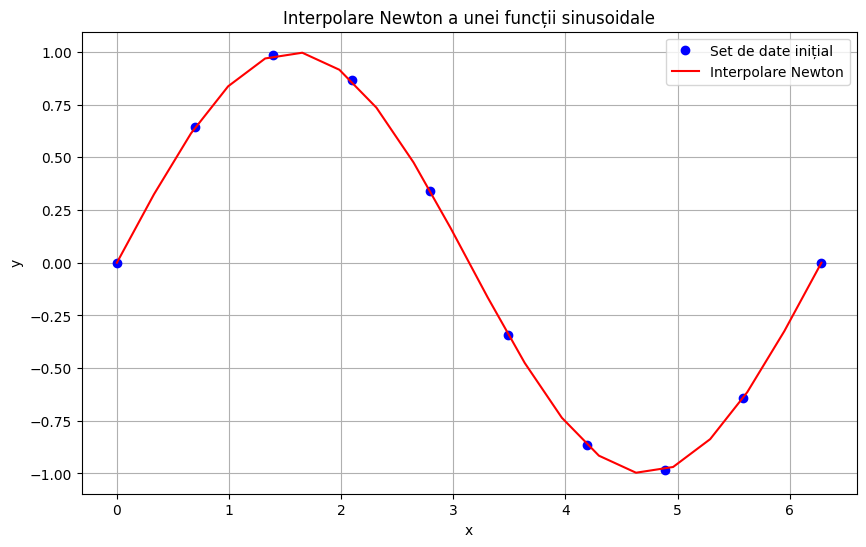

In [12]:
def interp_newton(x, y, xi):
    """
    Interpolează în anumite puncte folosind polinomul Newton asociat setului de date (x, y).

    Args:
        x (list): Lista valorilor x din setul de date.
        y (list): Lista valorilor y corespunzătoare valorilor x din setul de date.
        xi (list): Lista de puncte în care să se facă interpolarea.

    Returns:
        list: Lista valorilor interpolate yi în punctele date de xi.
    """
    n = len(x)
    m = len(xi)
    yi = [] 

    # calculăm coeficienții polinomului Newton
    c = get_c(x, y.copy())

    for i in range(m):
        # Inițializăm valoarea interpolată pentru punctul x_star[i] cu c_0
        y_interp = c[0]

        # Calculăm polinomul Newton pentru punctul x_star[i]
        for j in range(1, n):
            term = c[j]
            for k in range(j):
                term *= (xi[i] - x[k])
            y_interp += term

        # Adăugăm valoarea interpolată la lista rezultatelor
        yi.append(y_interp)
    return yi


# test
# generăm 10 puncte uniform distribuite în intervalul [0, 2π] pentru setul de date, și punctele xi unde interpolăm
x = np.linspace(0, 2 * np.pi, 10)
y = np.sin(x)
xi = np.linspace(0, 2 * np.pi, 20)  # Folosim mai multe puncte pentru a obține o interpolare mai fină

# interpolarea Newton
yi = interp_newton(x, y, xi)


# plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'bo', label='Set de date inițial')
plt.plot(xi, yi, 'r-', label='Interpolare Newton')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolare Newton a unei funcții sinusoidale')
plt.legend()
plt.grid(True)
plt.show()

**I.2. Fenomenul Runge - 3p**

Procesul de interpolare nu garantează generarea unei secvențe de polinoame care converg uniform către funcție pe măsură ce gradul polinomului de interpolare tinde la infinit. Exemplul clasic în acest sens este fenomenul lui Runge.
Să considerăm funcția $g(x) = \dfrac{1}{1 +x^2}$, cu $x$ în $[-5,5]$ și noduri egal distanțate.

De exemplu, pentru $n=12$ obținem următorul rezultat:

<img src="https://github.com/prodangp/LaboratorCN/blob/main/media/tema5/runge.png?raw=true" width=400/>

Putem observa cum la capete avem o divergență clară.

- Reprodu graficul de mai sus pentru diferite valori ale lui $n$.

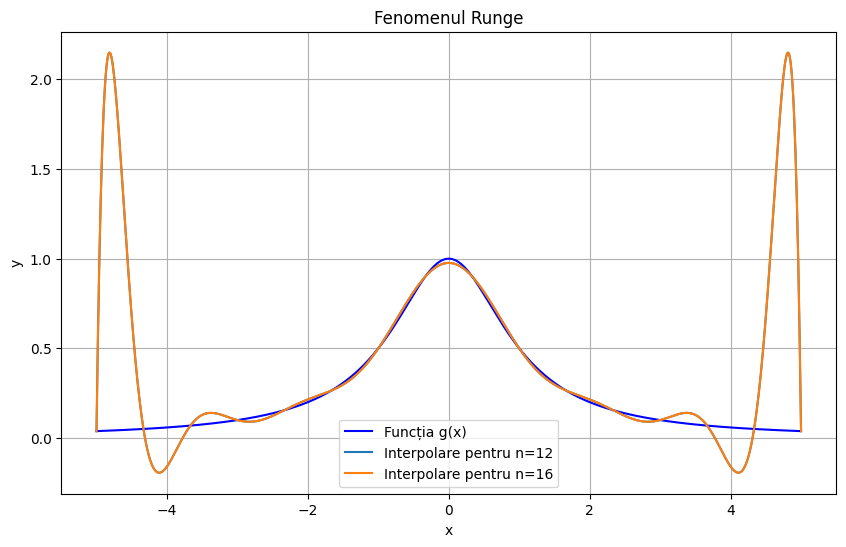

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Definim funcția g(x)
def g(x):
    return 1 / (1 + x**2)

# Definim intervalul [-5, 5]
x_interval = np.linspace(-5, 5, 1000)

# Generăm nodurile x
n_values = [12, 16]  # Diferite valori ale lui n
x_nodes = np.linspace(-5, 5, max(n_values))

# Reprezentăm graficul pentru diferite valori ale lui n
plt.figure(figsize=(10, 6))
plt.plot(x_interval, g(x_interval), label='Funcția g(x)', color='blue')

for n in n_values:
    y_nodes = g(x_nodes)
    y_interp = interp_newton(x_nodes, y_nodes, x_interval)
    plt.plot(x_interval, y_interp, label=f'Interpolare pentru n={n}')

plt.title('Fenomenul Runge')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


- Calculează eroarea absolută de tip Root - Mean - Squared Error, RMSE (norma 2 a vectorului diferență $y(x^*) - y^*(x^*)$), care exprimă cantitativ diferența dintre funcția interpolată și valorile date de diferiți interpolanți (cu $n$ diferit). Reprezintă grafic eroarea calculată, RMSE, în funcție de $n$. Consideră intervalul $[-5, 5]$.

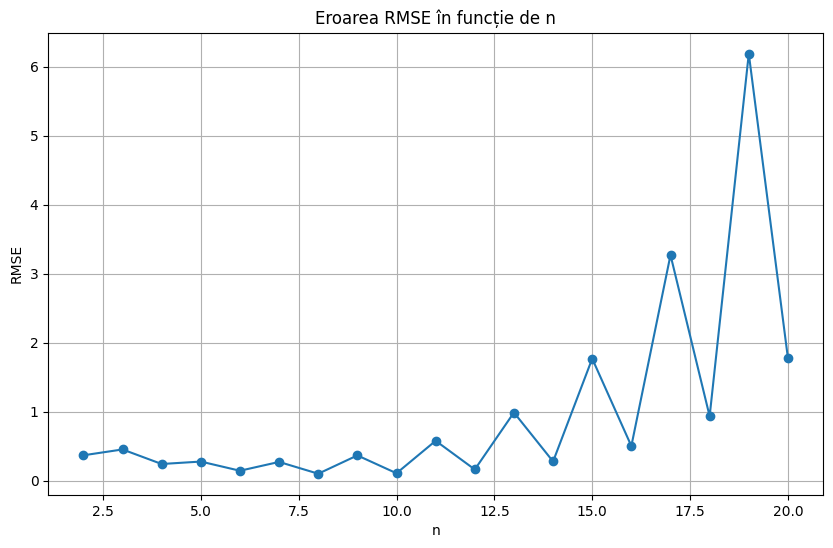

In [21]:
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Definim funcția g(x)
def g(x):
    return 1 / (1 + x**2)

# Generăm nodurile x
n_values = range(2, 21)  # Diferite valori ale lui n


# Generăm punctele pentru calculul RMSE
x_interval = np.linspace(-5, 5, 1000)

# Calculăm eroarea RMSE pentru fiecare valoare a lui n
rmse_values = []
for n in n_values:
    x_nodes = np.linspace(-5, 5, n)
    y_nodes = g(x_nodes)
    y_interp = interp_newton(x_nodes, y_nodes, x_interval)
    y_actual = g(x_interval)
    rmse = np.sqrt(mean_squared_error(y_actual, y_interp))
    rmse_values.append(rmse)

# Reprezentăm grafic eroarea RMSE în funcție de n
plt.figure(figsize=(10, 6))
plt.plot(n_values, rmse_values, marker='o', linestyle='-')
plt.title('Eroarea RMSE în funcție de n')
plt.xlabel('n')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()


- Comentați graficul obținut. Cum alegem interpolantul potrivit?


## Secțiunea 2 - Integrare numerică


**II.1. Estimarea lui $\pi$ (3p)** 

În acest exercițiu vom estima valoarea lui $\pi$ folosind integrarea numerică. Funcția `create_half_circle` este deja implementată și poate fi folosită cu scopul de a genera date pentru un număr specific de puncte care se găsesc pe o jumătăte de cerc. 

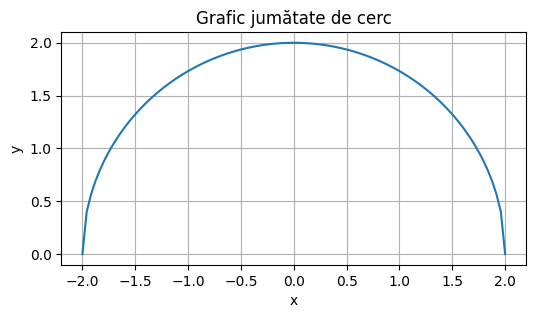

In [27]:
def create_half_circle(radius, num_points):
    """
    Generăm puncte pentru a construi grafic jumătate de cerc
    Args:
        radius (float): raza cercului, r
        num_points (int): numărul de puncte generate

    Returns:
        numpy.ndarray: cercul generat (x, y)
    """
    # definim valori pentru x uniform intre -r si r
    x_values = np.linspace(-radius, radius, num_points)

    # rezolvăm ecuația cercului pentru a afla y cunoscând x: y = sqrt(radius^2 - x^2)
    y_values = np.sqrt(radius**2 - x_values**2)
    half_circle = np.column_stack((x_values, y_values))

    return half_circle


half_circle_points = create_half_circle(radius=2, num_points=100)

plt.figure(figsize=(6, 6))
plt.plot(half_circle_points[:, 0], half_circle_points[:, 1])
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Grafic jumătate de cerc')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()


Aria de sub graficul unei jumătăți de cerc este $A=\pi r^2 /2$. 
- Folosind **metoda dreptunghiurilor** determină aria jumătății de cerc (aria de sub grafic) și estimează valoarea lui $\pi$ folosind $n=10$ noduri (10 dreptunghiuri).

- Reprezintă grafic jumătatea de cerc și cele 10 dreptunghiuri folosite la subpunctul anterior pentru a determina aria cercului. Hașurează aria celor 10 dreptunghiuri.

- Pentru fiecare din cele 10 noduri calculează eroarea absolută a ariei estimate pentru intervalul cuprins de acel dreptunghi. Reprezintă grafic această eroare în funcție de valoarea tangentei la grafic (pentru fiecare nod în parte). Pe ce porțiuni este mai mare eroarea de integrare?

*Indiciu: ca valoare absolută pentru fiecare porțiune, puteți folosi integrarea numerică cu un număr mare de iterații.*

**II.2. Date lipsă (2p)**

Să ne imaginăm o problemă de analiză numerică în care trebuie să integrăm numeric o funcție pe un interval dat, doar că setul de date pe care trebuie să lucrăm conține unele valori lipsă. Aceste valori lipsă pot afecta calculul corect al integralei.
<center>
<img src="https://miro.medium.com/v2/resize:fit:750/format:webp/0*xU1nY7sCPSoPsyLh" width=400/>
</center>

Scopul acestei probleme este de a dezvolta un algoritm de interpolare, care să completeze datele lipsă din setul de date (x, y), astfel încât să putem efectua o integrare numerică corectă și să calculăm aria sub graficul funcției pe întregul interval.

Datele de intrare (x, y) reprezintă un set de puncte de pe graficul unei funcții, dar unele valori din intervalul de interes au dispărut într-un mod misterios.

Setul de date îl puteți accesa [aici](https://github.com/prodangp/LaboratorCN/blob/main/data/dataset_hmw5.dat) sau îl puteți descărca de pe moodle.

- Acccesați și vizualizați datele pe care le aveți la dispoziție.

- Alegeți și folosiți algoritmi potriviți pentru a completa setul de date. Reprezentați graficul $y(x)$ înainte și după completarea setului de date.

- Folosiți metoda Simpson compozită cu interpolare pentru a estima aria graficului $y=y(x)$. 

- Dacă modificați algoritmii de interpolare, se schimbă rezultatul obținut la subpunctul precedent?